<a href="https://colab.research.google.com/github/RusMermaid/Data_science_course_teaching/blob/main/L3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from preamble import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import sparse
import pandas as pd
import IPython
import sklearn

#### В этом блокноте мы рассмотрим простой пример применения машинного обучения и построим нашу первую модель. 

В процессе мы
 мы познакомимся с некоторыми основными принципами и
терминами.


Алгоритмы машинного обучения используются для принятия решений на основе данных.

Данные состоят из отдельных объектов описывающих учеников, или пациентов, фотографии лиц, посты в соц сетях итд.

Что такое описание объекта?

Это разные признаки, выраженные в числах или категориях.

Например, рост, вес и цвет волос учеников.

Температура, давление, пульс, дата приема пациентов.

Значения яркости пикселов для каждой точки фото.

Частоты встречаемости разных слов в текстах.

Какие решения могут быть приняты на основе таких данных?

Предсказать группу здоровья ученика.

Опредилить диагноз пациента.

Определить, является ли человек сотрудником данной фирмы и открыть ворота на парковке.

Определить эмоциональную окраску текста.

Итд.

Если решения, которые мы ожидаем от искусственного интеллекта заключаются в в выборе одного ответа (класса) из нескольких возможных,
то такие задачи называются классификацией, например: 1я, 2я, 3я группа здоровья, или грипп, ангина, ковид, или человек работает/не работает в данной фирме, или положительный/отрицательный отзыв на товар в соц сетях.

Для задач классификации обычно нужен датасет, в котором для каждого объекта известен правильный ответ - значение определенного класса. Если алгоритм обучаясь использует такой датасет,  то такой процесс называется обучением с учителем или контролируемым обучением (supervised learning): пользователь предоставляет алгоритму данные - признаки-ответ, а алгоритм учится получать ответ по признакам.

В дальнейшем, алгоритм становится способен выдать ответ для объекта, которого он никогда не видел раньше, без какой-либо
помощи человека.

Давайте решим нашу первую задачу

Предположим, что ботаник-любитель хочет классифицировать сорта ирисов, которые он собрал. Он измерил в сантиметрах некоторые
характеристики ирисов: длину и ширину лепестков, а также длину и ширину чашелистиков (см. рисунок).


Кроме того, у него есть измерения этих же характеристик ирисов, которые ранее позволили опытному эксперту отнести их к сортам setosa,
versicolor и virginica. Относительно этих ирисов ботаник-любитель уверенно может сказать, к какому сорту принадлежит каждый ирис.


Давайте предположим, что перечисленные сорта являются единственными сортами, которые ботаник-любитель может встретить в
дикой природе.


Наша цель заключается в построении модели машинного обучения, которая сможет обучиться на основе характеристик ирисов, уже
классифицированных по сортам, и затем предскажет сорт для нового цветка ириса.

Данные, которые мы будем использовать для этого примера, – это набор
данных Iris, классический набор данных для учебных экспериментов в машинном обучении.

Загрузим данные и посмотрим на них.

In [ ]:
iris_df = pd.read_csv('iris.csv')

In [ ]:
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),setosa-0 versicolor-1 virginica-2
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
len(iris_df)

150

Наши данные состоят из 150 строк (примеров), описывающих цветки ириса 3х разных сортов.

Каждый пример содержит несколько измерений размеров лепестка и чашелистника одного конкретного цветка. Эти измерения называются факторами, или признаками (features)

Кроме этого, каждый пример содержит название сорта этого цветка. В данной задаче сорт цветка является целью предсказания, и называется меткой (label).

Итак, в нашей задаче мы имеем примеры, для которых знаем правильные ответы (метки сортов ириса), и на этих примерах мы хотим научить модель предсказывать сорт ириса. Такая задача является задачей обучения с учителем.

В этой задаче нам нужно предсказать один из 3х сортов ириса. Мы хотим отнести каждый пример к одной из 3х групп. Эти группы (сорта ириса) называются классами (classes). А такая задача является задачей классификации (classification).

Каждый ирис в наборе данных принадлежит к одному из трех классов, таким образом решаемая задача является задачей трехклассовой классификации.

Ответом для каждого примера данных (ириса) является тот или иной сорт этого цветка.

В последней колонке находится метка - правильный ответ, закодированный в числе: 0 – setosa, 1 – versicolor, а 2 – virginica.

Будем называть эту колонку target - то есть, цель нашего предсказания.

In [ ]:
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
target = 'setosa-0 versicolor-1 virginica-2'

#в список target_names запишем названия сортов ириса из целевой колонки
target_names = ['setosa', 'versicolor', 'virginica']

#### Чего мы ожидаем от модели: обучающий и тестовый датасеты.

На основе наших данных  мы хотим обучить модель. Она будет учиться предсказывать сорт ириса основе наших данных измерений и соответствующих им меток.

Когда модель научится, мы можем померить лепестки и чашелистники у какого-нибудь нового ириса и получить от модели предсказание его сорта.

Как нам понять, можно ли  доверять и использовать предсказания модели на новых данных, для которых у нас нет меток?

В чем сущность машинного обучения?
Вспомним, что если говорить самым простым образом, модель учится означает, что модель подбирает сложную формулу или алгоритм, который применяется к признакам и на выходе  

Допустим, мы хотим научить модель определять пол человека по нашим данным.
Мы описали маленькую группу людей, в данных записаны их имя и цвет волос. А меткой является пол.
Пусть в нашей группе всего 3 человека:

имя   цвет волос     пол

маша    русые          ж

миша    черные         м

саша    черные         м

Данных очень мало, научить модель на таком количестве невозможно.
Какой самый простой вывод сделает модель?
Что она предскажет для нового члена команды:

катя  черные       ?

Скорее всего, модель просто запомнит, что у мальчиков всегда черные волосы, а у девочек русые, или просто - не черные.
И уверенно скажет что Катя с черными волосами - мальчик.
И модель будет считать, что она молодец, правильно работает на всем обучающем наборе.

Это «запоминание» ничего не говорит нам об обобщающей способности модели (другими словами, мы
не знаем, будет ли эта модель так же хорошо работать на новых данных).

Для того, чтобы более адекватно оценивать качество работы модели, обучающее множество делят на 2 части.
Большую часть (обычно это 75% - 80% от всех данных) отделяют и называют обучающим датасетом или просто трейном (training set).
Оставшуюся часть (20% - 25%) называют тестовыми данными или просто тестом (test set).

Модель тренируется на обучающем наборе, а качество модели оценивается на тестовом наборе. Тестовый набор помечен метками (то есть там известны правильные ответы), но модель его не видела при обучении. Поэтому посчитав на тестовом датасете сколько раз модель ответила правильно, и сколько ошиблась, мы можем достаточно адекватно оценить качество ее работы, и принять решение, можно ли доверять предсказаниям модели на тех данных, где правильных ответов мы не знаем.

#### Важно:
Необходимо, чтобы обучающий и тестовый набор были бы похожи друг на друга. Чтобы данные были бы в них примерно одинаково распределены и сохранялось бы соотношение классов. Данные в датасетах часто бывают упорядочены, например наш набор про сорта ириса упорядочен по меткам сорта. Просто отделив 25% строк в конце датасета мы бы получили почти только сорт 2 в тестовом наборе, и сорта 0 и 1 в обучающем наборе. Поэтому, перед разбиением данных на тест и трейн их необходимо перемешивать.

В библиотеке scikit-learn есть функция train_test_split, которая перемешивает набор данных и разбивает его на две части. Эта функция отбирает в обучающий набор 75% строк данных с соответствующими метками. Оставшиеся 25% данных с метками объявляются тестовым набором. 

Параметр random_state задает способ перемешивания. Он установлен на конкретное число для того, чтобы полученный результат был воспроизводим (разбиение на трейн и тест было одинаковым при каждом запуске).


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_df[features], iris_df[target], random_state=17)

Выводом функции train_test_split являются X_train, X_test, y_train и y_test, которые являются массивами Numpy. 
X_train содержит 75% данных с измерениями, а y_train метки, соответствующие измерениям.

X_test содержит оставшиеся 25% измерений, а y_test - соответствующие им метки:

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (112, 4)
y_train shape: (112,)


In [ ]:
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (38, 4)
y_test shape: (38,)


In [ ]:
y_test 

16     0
78     1
145    2
99     1
126    2
127    2
84     1
117    2
80     1
113    2
144    2
9      0
55     1
11     0
110    2
19     0
38     0
116    2
100    2
132    2
133    2
28     0
149    2
69     1
66     1
85     1
53     1
73     1
0      0
92     1
29     0
98     1
37     0
5      0
81     1
97     1
96     1
125    2
Name: setosa-0 versicolor-1 virginica-2, dtype: int64

#### Вначале посмотрим на наши данные

Перед тем как строить модель машинного обучения, стоит 
исследовать данные, чтобы понять, может ли задача быть решена.

Кроме того, исследование данных – это хороший способ обнаружить аномалии и особенности. Например, вполне возможно, что некоторые из ваших ирисов измерены в дюймах, а не в сантиметрах. В реальном мире нестыковки в данных и неожиданности очень распространены.

Давайте визуализируем данные с помощью матрицы диаграмм рассеяния (scatter plot). 
В диаграмме рассеяния один признак откладывается по оси х, а другой признак – по оси у, каждому наблюдению соответствует точка. Построив матрицу мы увидим попарные зависимости между факторами.

Точки данных окрашены в соответствии с сортами ириса, к которым они относятся. 

По диагонали этой матрицы располагаются гистограммы каждого признака:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f89071c2790>,
      dtype=object)

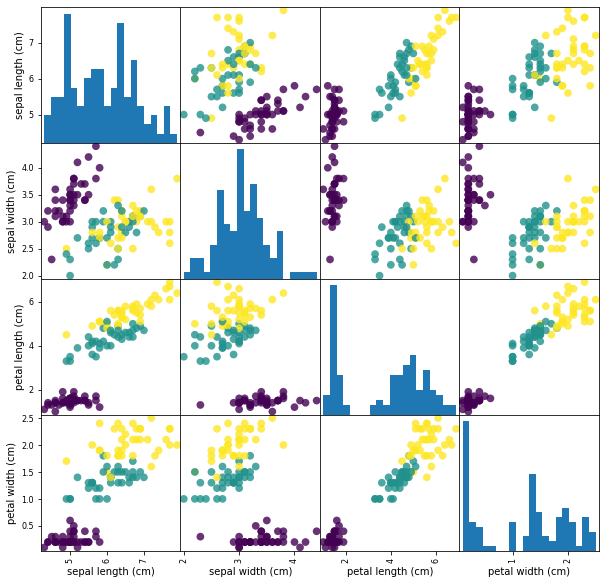

In [ ]:
pd.plotting.scatter_matrix(X_train, c=y_train, figsize=(10, 10),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

Взглянув на график, мы можем увидеть, что, похоже, измерения чашелистиков и лепестков позволяют относительно хорошо разделить
три класса. 

Это означает, что модель машинного обучения, вероятно, сможет научиться разделять их.

#### Построим нашу первую модель: k-Nearest Neighbors. K ближайших соседей. 

Теперь мы можем начать строить реальную модель машинного обучения. В библиотеке scikit-learn имеется довольно много алгоритмов
классификации, которые мы могли бы использовать для построения модели. 

В данном примере мы будем использовать классификатор на основе метода k ближайших соседей, который легко интерпретировать.
Построение этой модели заключается лишь в запоминании обучающего набора. Для того, чтобы сделать прогноз для новой точки данных, алгоритм находит точку в обучающем наборе, которая находится ближе
всего к новой точке. Затем он присваивает метку, принадлежащую этой точке обучающего набора, новой точке данных.

k в методе k ближайших соседей означает, что вместо того, чтобы использовать лишь ближайшего соседа новой точки данных, мы в ходе обучения можем рассмотреть любое фиксированное число (k) соседей (например, рассмотреть ближайшие три или пять соседей). 

Тогда мы можем сделать прогноз для точки данных, используя класс, которому принадлежит большинство ее соседей.

Метод ближайших соседей (k Nearest Neighbors, или kNN) — очень популярный метод классификации. Это, наравне с деревом решений, один из самых понятных подходов к классификации. На уровне интуиции суть метода такова: посмотри на соседей, какие преобладают, таков и ты. 

Важно правильно выбрать метрику расстояния и если метрика расстояния между примерами введена достаточно удачно, то схожие примеры гораздо чаще лежат в одном классе, чем в разных. 

Согласно методу ближайших соседей, тестовый пример  будет отнесен к классу "синие", а не "красные".


Например, если не знаешь, какой тип товара указать в объявлении для продажи велосипеда, можно найти объяалений с велосипедами, 
и если 4 из них отнесены к категории "спорт", и только один - к категории "транспорт", то здравый смысл подскажет 
для своего объявления тоже указать категорию "спорт".

Для классификации каждого из объектов тестовой выборки необходимо последовательно выполнить следующие операции:
 - Вычислить расстояние до каждого из объектов обучающей выборки
 - Отобрать $k$ объектов обучающей выборки, расстояние до которых минимально
 - Класс классифицируемого объекта — это класс, наиболее часто встречающийся среди $k$ ближайших соседей
 
 Примечательное свойство такого подхода  – его ленивость. Это значит, что вычисления начинаются только в момент классификации 
тестового примера, а заранее, только при  наличии обучающих примеров, никакая модель не строится. 
 

### Метод ближайших соседей в реальных задачах
- В чистом виде kNN может послужить хорошим стартом (baseline) в решении какой-либо задачи;

Качество классификации методом ближайших соседей зависит от нескольких параметров:
 - число соседей
 - метрика расстояния между объектами (часто  евклидово расстояние, то есть, корень квадратный из суммы квадратов разностей признаков - координат). 
Отметим, что при использовании большинства метрик значения признаков надо масштабировать. 
Условно говоря, чтобы признак "Зарплата" с диапазоном значений до 100 тысяч не вносил больший вклад в расстояние, 
чем "Возраст" со значениями до 100. 
 - веса соседей (соседи тестового примера могут входить с разными весами, например, чем дальше пример, тем с меньшим коэффициентом учитывается его "голос")

#### Итак, построим нашу первую модель:

В scikit-learn все модели машинного обучения реализованы в собственных классах, называемых классами Estimator. Алгоритм
классификации на основе метода k ближайших соседей реализован в классификаторе KNeighborsClassifier модуля neighbors. Прежде чем использовать эту модель, нам нужно создать объект-экземпляр класса.

Это произойдет, когда мы зададим параметры модели. Самым важным параметром KNeighborsClassifier является количество соседей, которые мы установим равным 1:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Объект knn включает в себя алгоритм, который будет использоваться для построения модели на обучающих данных, а также алгоритм,
который сгенерирует прогнозы для новых точек данных. Он также будет содержать информацию, которую алгоритм извлек из обучающих
данных. В случае с KNeighborsClassifier он будет просто хранить обучающий набор.

Для построения модели на обучающем наборе, мы вызываем метод fit объекта knn, который принимает в качестве аргументов массив
NumPy X_train, содержащий обучающие данные, и массив NumPy y_train, соответствующий обучающим меткам:

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

#### Построение прогнозов, Making Predictions

Теперь мы можем получить прогнозы, применив нашу модель к новым данным, по которым мы еще не знаем правильные метки. 

Представьте, что мы нашли в дикой природе ирис с длиной чашелистика 5 см, шириной чашелистика 2.9 см, длиной лепестка 1 см и шириной лепестка 0.2 см. К какому сорту ириса нужно отнести этот цветок? 

Мы можем поместить эти данные в массив NumPy. 

Посмотрим на его форму: количество примеров (1 строка) на количество признаков (4 столбца):

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])
print("X_new.shape:", X_new.shape)

X_new.shape: (1, 4)


Обратите внимание, что мы записали измерения по одному цветку в двумерный массив NumPy, поскольку scikit-learn работает с
двумерными массивами данных.

Чтобы сделать прогноз, мы вызываем метод predict объекта knn:

In [ ]:
prediction = knn.predict(X_new)[0]
print("предсказаная метка:", prediction)
print("сорт ириса:",
       target_names[prediction])

предсказаная метка: 0
сорт ириса: setosa


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


Наша модель предсказывает, что этот новый цветок ириса принадлежит к классу 0, что означает сорт setosa. Но как узнать, можем
ли мы доверять нашей модели? 

Правильный сорт ириса для этого примера нам неизвестен, а ведь именно получение правильных прогнозов и является главной задачей построения модели!

#### Оценка качества модели. Evaluating the Model

Это тот самый момент, когда нам понадобится созданный ранее тестовый набор. Эти данные не использовались для построения модели, но мы знаем правильные сорта для каждого ириса в тестовом наборе. 

Поэтому, мы можем сделать прогноз для каждого ириса в тестовом наборе и сравнить его с фактической меткой (уже известным
сортом). 

Мы можем оценить качество модели, вычислив "аккуратность" (accuracy) – процент цветов, для которых модель правильно
спрогнозировала сорта:

Вначале посмотрим на предсказания для тестового набора:

In [ ]:
y_pred = knn.predict(X_test)
print("Test set predictions:\n", y_pred)

Test set predictions:
 [0 1 2 1 2 2 1 2 1 2 2 0 1 0 2 0 0 2 2 2 1 0 2 1 1 1 1 1 0 1 0 1 0 0 1 1 1
 2]


Давайте посмотрим в каком проценте случаев наша модель делает правильное предсказание.

Как посчитать процент правильных ответов?

Количество правильных ответов разделить на количество всех примеров в тестовом наборе.

метод score объекта knn сделает это за нас.

In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Правильность этой модели для тестового набора составляет около 0.97, что означает, что мы дали правильный прогноз для 97% ирисов в тестовом наборе. 

При некоторых математических допущениях, это означает, что мы можем ожидать, что наша модель в 97% случаев даст правильный прогноз для новых ирисов. 

Для нашего ботаника-любителя этот высокий уровень "аккуратности" означает, что наша модель  достаточно надежна в использовании.

### Summary and Outlook

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    iris_df[features], iris_df[target], random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))

Test set score: 0.97


Этот фрагмент содержит базовый код, необходимый для применения любого алгоритма машинного обучения с помощью scikit-learn.
Методы fit, predict и score являются общими для моделей контролируемого обучения в scikit-learn и, используя принципы,
приведенные в этом уроке, вы можете применить эти модели для решения различных задач машинного обучения. 

Итак, в этом блокноте мы сформулировали задачу классификации ирисов на основе проведенных измерений характеристик
цветов. 

Мы использовали набор данных, в котором эксперт уже предварительно классифицировал ирисы для построения модели, таким
образом, мы решали задачу обучения с учителем. 

Было три возможных сорта ирисов – setosa, versicolor и virginica, что делало нашу задачу задачей 3-классовой классификации. В задаче классификации возможные сорта ирисов называются классами (classes) а сами названия сортов – метками (labels).

Набор данных Iris является датафреймом pandas.

Мы разделили наш набор данных на обучающий набор (training set), чтобы построить нашу модель, а также тестовый набор (test set), чтобы оценить, насколько хорошо наша модель будет классифицировать новые,
ранее незнакомые ей данные.

Мы выбрали алгоритм классификации k ближайших соседей, который генерирует прогноз для нового объекта данных ( измерений цветка) рассматривая ее находя его ближайшего соседа(ей) в обучающем наборе. 

Все это реализовано в классе KNeighborsClassifier, который содержит алгоритм, строящий модель, а также алгоритм, который дает прогнозы, используя построенную модель. 

Мы создали объект-экземпляр класса, задав параметры. Затем мы построили модель, вызвав метод fit и передав обучающие данные (X_train) и обучающие ответы (y_train) в качестве параметров. 

Мы оценили качество модели с использованием метода score, который вычисляет "аккуратность" модели. Мы применили метод
score к тестовым данным и тестовым ответам и обнаружили, что наша модель демонстрирует "аккуратность" около 97%. Это означает, что модель выдает правильные прогнозы для 97% наблюдений тестового набора.


Это убедило нас в том, что модель можно применить к новым данным (в нашем примере это измерения характеристик новых цветов), и мы надеемся, что эта модель даст правильные прогнозы в 97% случаев.
